In [1]:
import time
start_time=time.time()

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import lmfit

from bfunc import bfunc00,bfunc01,bfunc02

Data load and region parameters

In [3]:
Sample='orion'

samples=pd.read_csv('SampleList//'+Sample+'.csv',header=None)

DataNO=dict()
DataO=dict()


for i in range(len(samples)):
    DataNO[i]=samples[0][i]
    
for i in range(len(samples)):
    DataO[i]=pd.read_csv('SFdata//'+DataNO[i]+'.csv')    



samples

,0
0,1951VHOrion1
1,1951VHOrion2
2,1958MchOrion
3,2016ArthOrionH
4,Orion1
5,Orion2


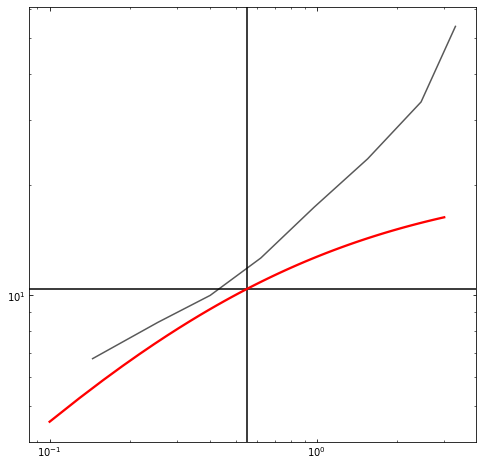

In [4]:
fig, ax=plt.subplots(figsize=(8,8))

plt.loglog(DataO[5].pc,DataO[5].S,color="black",alpha=0.65)

plt.axhline(y=3.23**2, color='black', linestyle='-')
plt.axvline(x=0.55, color='black', linestyle='-')

lo=0.55
ss=3.23**2
n=0.75
x=np.linspace(0.1,3,100)
c=1/(1+(x/lo)**n)
y=2*(1-c)*ss
plt.loglog(x,y,color='r', linestyle='-',linewidth='2.3')

#ax.text(0.83, 0.15,'m = 1.15', ha='center', va='center', transform=ax.transAxes, color='red')
#ax.text(0.83, 0.20,'r$_{0}$ = 1.5 pc', ha='center', va='center', transform=ax.transAxes, color='red')
#ax.text(0.84, 0.25,'σ = 2.7 km/s', ha='center', va='center', transform=ax.transAxes, color='red')
    
#ax.set(xlabel='r [pc]', ylabel='B(r) [km$^{2}$/s$^{2}$]')
plt.tick_params(which='both', labelright=False, direction='in', right=True,  top=True)


In [5]:
rgrid = np.logspace(0.1, 3)

s0 = (0.00242)/2.355             
m = 0.75

sig2 = ss
r0 = 0.55

B=DataO[5].S[0:6]
r=DataO[5].pc[0:6]

In [29]:
r = pd.Series([0.06]).append(r)
B = pd.Series([2.12**2]).append(B)

In [30]:
model02 = lmfit.Model(bfunc02)
model02.param_names

['r0', 'sig2', 'm', 's0', 'noise']

In [31]:
relative_uncertainty = 0.1
weights = 1.0 / (relative_uncertainty * B)
weights[r > r0] /= 1.25

In [32]:
for p in model02.param_names:
    model02.set_param_hint(p, min=0.0)
model02.set_param_hint("sig2", value=sig2, vary=False)
#model02.set_param_hint("s0", min=0.2)
model02.print_param_hints()

Name      Value      Min      Max     Vary    Expr    
m           nan        0      inf     True    
noise       nan        0      inf     True    
r0          nan        0      inf     True    
s0          nan        0      inf     True    
sig2    10.4329        0      inf    False    


In [33]:
B

0     4.494400
0     6.739420
1     8.452805
2    10.007076
3    12.638353
4    17.367990
5    23.483277
dtype: float64

In [34]:
result2 = model02.fit(
    B, 
    weights=weights,
    r=r, r0=r0, m=m, s0=s0, noise=1/10,
)

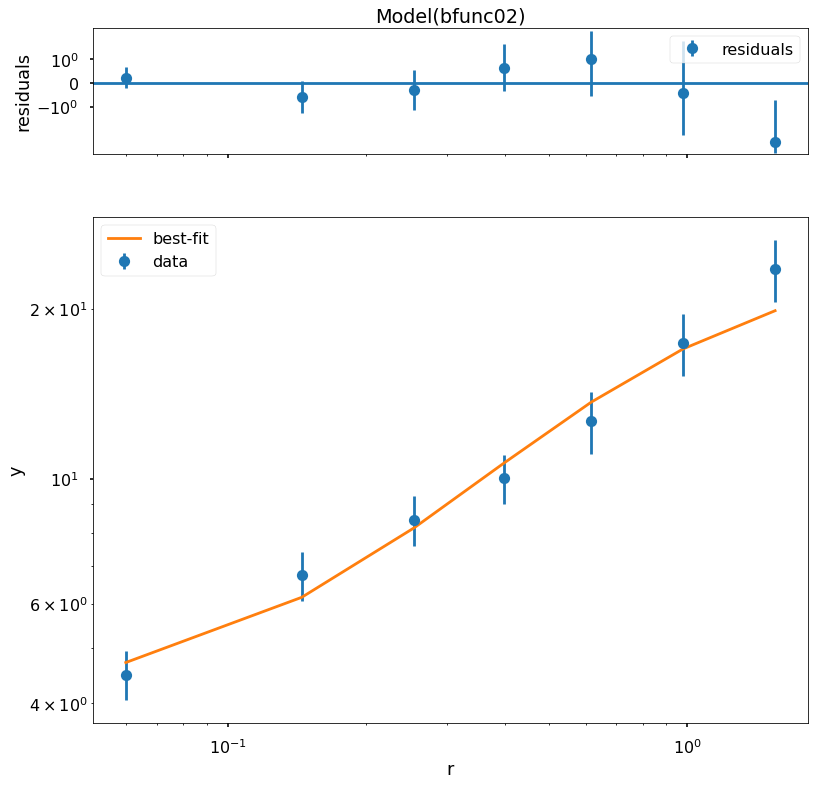

In [11]:
fig, _ = result2.plot()
fig.axes[0].set(
    xscale="log",
    yscale="symlog",
)
fig.axes[1].set(
    xscale="log",
    yscale="log",
);

In [12]:
print(result2.fit_report())

[[Model]]
    Model(bfunc02)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 49
    # data points      = 6
    # variables        = 4
    chi-square         = 0.79227618
    reduced chi-square = 0.39613809
    Akaike info crit   = -4.14762825
    Bayesian info crit = -4.98059037
##  Warning: uncertainties could not be estimated:
    s0:     at initial value
[[Variables]]
    r0:     0.89470599 (init = 0.55)
    sig2:   10.4329 (fixed)
    m:      1.96250401 (init = 0.75)
    s0:     0.00102760 (init = 0.001027601)
    noise:  6.40301672 (init = 0.1)


In [13]:
for p in result2.model.param_names:
    result2.params[p].stderr = result2.params[p].value * 0.1

In [14]:
result2.conf_interval()
print(result2.ci_report())

/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/lmfit/confidence.py:334: UserWarning: rel_change=1.3979411099149386e-12 < 1e-05 at iteration 87 and prob(r0=8.678648086551442) = 0.9930481764541325 < max(sigmas).
  warn(errmsg)
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/lmfit/confidence.py:319: UserWarning: Bound reached with prob(m=0.0) = 0.9941246371515883 < max(sigmas)
  warn(errmsg)
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/lmfit/confidence.py:334: UserWarning: rel_change=9.895201040638592e-06 < 1e-05 at iteration 66 and prob(m=14.915030463970295) = 0.9794317885398311 < max(sigmas).
  warn(errmsg)
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/lmfit/confidence.py:334: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(s0=0.000924840764331214) = 0.0 < max(sigmas).
  warn(errmsg)
/Users/will/miniconda3/envs/py39/lib/python3.9/site-packages/lmfit/confidence.py:334: UserWarning: rel_change=0.0 < 1e-05 at iteration 1

          99.73%    95.45%    68.27%    _BEST_    68.27%    95.45%    99.73%
 r0   :  -0.87622  -0.57432  -0.11104   0.89471  +0.12434  +0.63843      +inf
 m    :      -inf  -1.15778  -0.40601   1.96250  +0.47475  +2.31702      +inf
 s0   :      -inf      -inf      -inf   0.00103      +inf      +inf      +inf
 noise:      -inf      -inf  -1.03228   6.40302  +0.77642  +2.22000  +7.03797


In [19]:
plt.style.use([
    "seaborn-poster",
])

In [22]:
plot_limits = {
    "s0": [0.0, 1],
    "m": [0.0, 3.0],
    "r0": [0.0, 3.0],
    "noise": [0.0, 10.0],
}

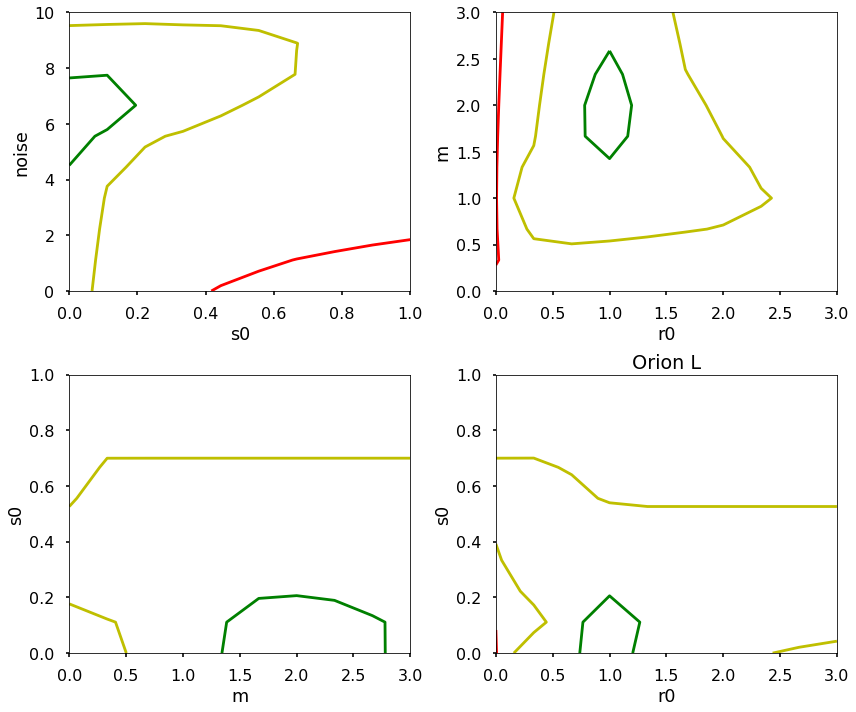

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

plt.title('Orion L')
levels = [0.6827, 0.9545, 0.9973]
colors = ["g", "y", "r"]

for ax, [xvar, yvar] in zip(axes.flat, [
    ["s0", "noise"],
    ["r0", "m"],
    ["m", "s0"],
    ["r0", "s0"],
]):
    cx, cy, grid = lmfit.conf_interval2d(
        result2, result2, xvar, yvar, 10, 10,
        limits=[plot_limits[xvar], plot_limits[yvar]],
    )
    ctp = ax.contour(cx, cy, grid, levels, colors=colors)
    ax.set_xlabel(xvar)
    ax.set_ylabel(yvar)

fig.tight_layout();

In [18]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 277.2798812389374 seconds ---
